In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint,Callback
from keras.optimizers import Adam
from keras.datasets import mnist
from sklearn.preprocessing import StandardScaler
import keras.callbacks

In [2]:
(X_train, y_trian), (X_val, y_val) = mnist.load_data()

In [3]:
y_trian.shape

(60000,)

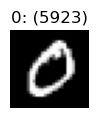

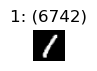

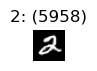

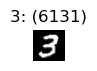

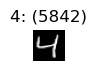

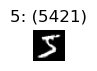

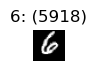

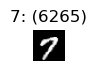

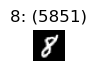

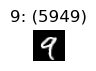

In [7]:
unique_labels = set(y_trian)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))

i = 1
for label in unique_labels:
    image = X_train[y_trian.tolist().index(label)]
    plt.subplot(10,10,i)
    plt.axis('off')
    plt.title('{0}: ({1})'.format(label,y_trian.tolist().count(label)))
    i+=1
    _ = plt.imshow(image, cmap='gray')
    plt.show()

In [13]:
X_train = X_train.astype('float32')/255.
X_val = X_val.astype('float32')/255
y_val.shape

(10000,)

In [14]:
from tensorflow.python.keras.utils.np_utils import to_categorical
y_trian = to_categorical(y_trian, 10)
y_val = to_categorical(y_val, 10)

In [16]:
y_val.shape

(10000, 10)

In [20]:
X_val.shape

(10000, 28, 28)

In [21]:

X_val = np.reshape(X_val, (10000, 784))

In [25]:
model_sigmoid = Sequential()
model_sigmoid.add(Dense(700, input_dim = 784,activation='sigmoid'))
model_sigmoid.add(Dense(700,activation='sigmoid'))
model_sigmoid.add(Dense(700,activation='sigmoid'))
model_sigmoid.add(Dense(700,activation='sigmoid'))
model_sigmoid.add(Dense(700,activation='sigmoid'))
model_sigmoid.add(Dense(350,activation='sigmoid'))
model_sigmoid.add(Dense(100,activation='sigmoid'))
model_sigmoid.add(Dense(10,activation='softmax'))


In [26]:
model_sigmoid.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 700)               549500    
                                                                 
 dense_9 (Dense)             (None, 700)               490700    
                                                                 
 dense_10 (Dense)            (None, 700)               490700    
                                                                 
 dense_11 (Dense)            (None, 700)               490700    
                                                                 
 dense_12 (Dense)            (None, 700)               490700    
                                                                 
 dense_13 (Dense)            (None, 350)               245350    
                                                                 
 dense_14 (Dense)            (None, 100)              

In [29]:
model_sigmoid.compile(loss='categorical_crossentropy',optimizer = 'sgd',metrics = ['accuracy'])

In [30]:
model_relu = Sequential()
model_relu.add(Dense(700, input_dim=784,activation='relu'))
model_relu.add(Dense(700,activation='relu'))
model_relu.add(Dense(700,activation='relu'))
model_relu.add(Dense(700,activation='relu'))
model_relu.add(Dense(700,activation='relu'))
model_relu.add(Dense(350,activation='relu'))
model_relu.add(Dense(100,activation='relu'))
model_relu.add(Dense(10,activation='softmax'))

In [31]:
model_relu.compile(loss='categorical_crossentropy',optimizer = 'sgd',metrics = ['accuracy'])


In [35]:
class history_loss(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
    def on_batch_end(self,batch,logs={}):
        batch_loss = logs.get('loss')
        self.losses.append(batch_loss)

In [40]:
n_epoch = 10
batch_size = 64
validation = 0.2
history_sigmoid = history_loss()
model_sigmoid.fit(X_train,y_trian,epochs=n_epoch,batch_size=batch_size,
                  callbacks=[history_sigmoid],
                  validation_split=validation)
history_relu = history_loss()
model_relu.fit(X_train,y_trian,epochs=n_epoch,batch_size=batch_size,
                  callbacks=[history_relu],
                  validation_split=validation)

Epoch 1/10
750/750 [==============================] - 13s 17ms/step - loss: 2.3022 - accuracy: 0.1098 - val_loss: 2.3025 - val_accuracy: 0.1060
Epoch 2/10
750/750 [==============================] - 12s 17ms/step - loss: 2.3023 - accuracy: 0.1112 - val_loss: 2.3024 - val_accuracy: 0.1060
Epoch 3/10
750/750 [==============================] - 14s 18ms/step - loss: 2.3022 - accuracy: 0.1111 - val_loss: 2.3022 - val_accuracy: 0.1060
Epoch 4/10
750/750 [==============================] - 13s 17ms/step - loss: 2.3021 - accuracy: 0.1114 - val_loss: 2.3029 - val_accuracy: 0.1060
Epoch 5/10
750/750 [==============================] - 13s 18ms/step - loss: 2.3023 - accuracy: 0.1108 - val_loss: 2.3027 - val_accuracy: 0.1060
Epoch 6/10
750/750 [==============================] - 13s 17ms/step - loss: 2.3025 - accuracy: 0.1113 - val_loss: 2.3025 - val_accuracy: 0.1060
Epoch 7/10
750/750 [==============================] - 14s 19ms/step - loss: 2.3024 - accuracy: 0.1113 - val_loss: 2.3033 - val_accuracy:

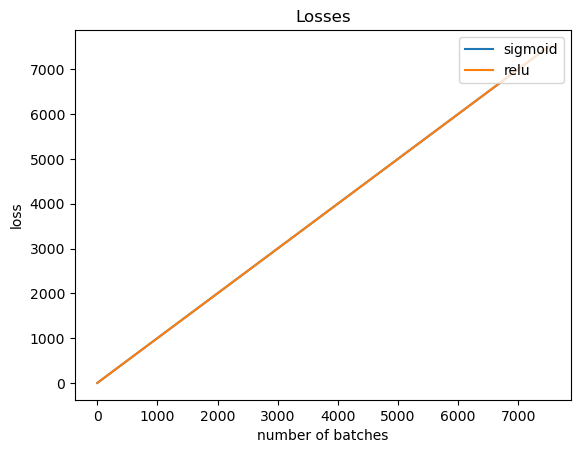

In [41]:
plt.plot(np.arange(len(history_sigmoid.losses)),label='sigmoid')
plt.plot(np.arange(len(history_relu.losses)),label='relu')
plt.title('Losses')
plt.xlabel('number of batches')
plt.ylabel('loss')
plt.legend(loc=1)
plt.show()